In [250]:
import pandas as pd
import numpy as np
import json
import datetime
import tldextract
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [227]:
#variable declarations
month_labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
hour_labels=['12 am','1 am','2 am','3 am','4 am','5 am','6 am','7 am','8 am','9 am','10 am','11 am','12 pm','1 pm','2 pm','3 pm','4 pm','5 pm','6 pm','7 pm','8 pm','9 pm','10 pm','11 pm']

In [5]:
with open('BrowserHistory.json') as f:
    data = json.loads(f.read())
    df = pd.DataFrame(data['Browser History'])
df.head(1)

,client_id,favicon_url,page_transition,time_usec,title,url
0,EQff/asGu7bNud976Aji/A==,NaN,LINK,1522668192005404,"Android Police - Android news, reviews, apps, ...",https://www.androidpolice.com/


In [6]:
df.drop(['client_id','favicon_url'],inplace=True,axis=1)
df.head(1)

,page_transition,time_usec,title,url
0,LINK,1522668192005404,"Android Police - Android news, reviews, apps, ...",https://www.androidpolice.com/


In [8]:
def get_dt(x):
    return datetime.datetime.fromtimestamp(x/1000000)
df['dt'] = df['time_usec'].apply(get_dt)
df.head(1)

,page_transition,time_usec,title,url,dt
0,LINK,1522668192005404,"Android Police - Android news, reviews, apps, ...",https://www.androidpolice.com/,2018-04-02 16:53:12.005404


In [9]:
df.drop(['time_usec'],inplace=True,axis=1)
df.head(1)

,page_transition,title,url,dt
0,LINK,"Android Police - Android news, reviews, apps, ...",https://www.androidpolice.com/,2018-04-02 16:53:12.005404


In [10]:
def get_date(x):
    return str(x.date())
df['date'] = df['dt'].apply(get_date)
df.head(1)

,page_transition,title,url,dt,date
0,LINK,"Android Police - Android news, reviews, apps, ...",https://www.androidpolice.com/,2018-04-02 16:53:12.005404,2018-04-02


In [11]:
def is_weekend(x):
    if x.weekday() >=5:
        return 'Y'
    return 'N'
df['is_weekend'] = df['dt'].apply(is_weekend)
df.head(1)

,page_transition,title,url,dt,date,is_weekend
0,LINK,"Android Police - Android news, reviews, apps, ...",https://www.androidpolice.com/,2018-04-02 16:53:12.005404,2018-04-02,N


In [12]:
def get_month(x):
    return int(x.month)
df['month'] = df['dt'].apply(get_month)
df.head(1)

,page_transition,title,url,dt,date,is_weekend,month
0,LINK,"Android Police - Android news, reviews, apps, ...",https://www.androidpolice.com/,2018-04-02 16:53:12.005404,2018-04-02,N,4


In [13]:
def is_secure(x):
    if x.startswith("https"):
        return "Yes"
    return "No"
df['is_secure'] = df['url'].apply(is_secure)
df.head(1)

,page_transition,title,url,dt,date,is_weekend,month,is_secure
0,LINK,"Android Police - Android news, reviews, apps, ...",https://www.androidpolice.com/,2018-04-02 16:53:12.005404,2018-04-02,N,4,Yes


In [14]:
def get_day(x):
    return int(x.day)
df['day'] = df['dt'].apply(get_day)
df.head(1)

,page_transition,title,url,dt,date,is_weekend,month,is_secure,day
0,LINK,"Android Police - Android news, reviews, apps, ...",https://www.androidpolice.com/,2018-04-02 16:53:12.005404,2018-04-02,N,4,Yes,2


In [15]:
days_of_week = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun'];
def get_day_of_week(x):
    return days_of_week[x.weekday()] 
df['day_of_week'] = df['dt'].apply(get_day_of_week)
df.head(1)

,page_transition,title,url,dt,date,is_weekend,month,is_secure,day,day_of_week
0,LINK,"Android Police - Android news, reviews, apps, ...",https://www.androidpolice.com/,2018-04-02 16:53:12.005404,2018-04-02,N,4,Yes,2,Mon


In [16]:
def get_hour(x):
    return int(x.hour)
df['hour'] = df['dt'].apply(get_hour)
df.head(1)

,page_transition,title,url,dt,date,is_weekend,month,is_secure,day,day_of_week,hour
0,LINK,"Android Police - Android news, reviews, apps, ...",https://www.androidpolice.com/,2018-04-02 16:53:12.005404,2018-04-02,N,4,Yes,2,Mon,16


In [17]:
def get_domain(x):
    domain_detail_tuple = tldextract.extract(x)
    sub_domain_name = domain_detail_tuple[0]
    domain_name = domain_detail_tuple[1]
    if (sub_domain_name == 'mail') & (domain_name == 'google'):
        return 'gmail'
    if (domain_name == 'ril') | (domain_name == 'jio'):
        return sub_domain_name + '.' + domain_name
    if (sub_domain_name == 'www') & (domain_name == 'google'):
        return 'google_search'
    if (domain_name == 'google'):## cases like google keep and google takeout
        return sub_domain_name + '.' + domain_name
    return domain_name
df['website'] = df['url'].apply(get_domain)
df.head(1)

,page_transition,title,url,dt,date,is_weekend,month,is_secure,day,day_of_week,hour,website
0,LINK,"Android Police - Android news, reviews, apps, ...",https://www.androidpolice.com/,2018-04-02 16:53:12.005404,2018-04-02,N,4,Yes,2,Mon,16,androidpolice


In [18]:
#filter out newtabs
df = df[df['website'] != 'newtab']
#filter out FORM_SUBMITS
df = df[df['page_transition'] != "FORM_SUBMIT"]

In [20]:
#search query if google search
def get_search_query(x):
    return x.split('-')[0].strip()
df['search_query'] = df[df['website'] == 'google_search']['title'].apply(get_search_query)
df['search_query'].fillna(value='Not_Search_Query',inplace=True)
df.head(1)

,page_transition,title,url,dt,date,is_weekend,month,is_secure,day,day_of_week,hour,website,search_query
0,LINK,"Android Police - Android news, reviews, apps, ...",https://www.androidpolice.com/,2018-04-02 16:53:12.005404,2018-04-02,N,4,Yes,2,Mon,16,androidpolice,Not_Search_Query


In [52]:
#get category of website
def get_category(x):
    if x in 'androidpolice firstpost timesofindia livemint theverge gizmochina gsmarena indianexpress thenextweb indiatoday ndtv'.split(' '):
        return 'News'
    if x in 'facebook twitter plus.google'.split(' '):
        return 'Social'
    if x in 'youtube jiocinema netflix reddit gmail'.split(' '):
        return 'Entertainment'
    if x in 'moneycontrol sharekhan zerodha razorpay hdfcbank bseindia business-standard marketsguruji thehindubusinessline forbesindia economictimes financialexpress businessworld moneyexcel'.split(' '):
        return 'Finance'
    if x in 'ccavenue ezeclick citruspay americanexpress amxvpos'.split(' '):
        return 'Payments'
    if x in 'flipkart amazon primeabgb sharafdg lenscart aliexpress ysl i-on cashify'.split(' '):
        return 'Shopping'
    if x in 'udemy coursera freecodecamp github'.split(' '):
        return 'Learning'
    if x in 'quora medium wikipedia xda-developers elastic npmjs'.split(' '):
        return 'Knowledge'
    if x in 'freetutorials apkmirror androidfilehost sourceforge franco-lnx drive.google'.split(' '):
        return 'Downloads'
    if x in 'stackoverflow stackexchange'.split(' '):
        return 'Doubts'
    if x in 'cmxlog lineageos twrp miui'.split(' '):
        return 'Android Development'
    if x in 'placyms rait.ac mu dypatil tcs tcsion'.split(' '):
        return 'College'
    if x in 'rarbg 1337x thepiratebay extratorrent shaanig'.split(' '):
        return 'Torrent'
    if x in 'fiori.ril jioconnect gitlab.jio.ril mail.ril jionet.jio dev.media.jio qa.media.jio jira.ril'.split(' '):
        return 'Work'
    if x in 'coindelta zebpay'.split(' '):
        return 'CryptoExchange'
    if x in '192.168.0.1 192.168.1.1 dd-wrt'.split(' '):
        return 'Router Config'
    if x in ['google_search']:
        return 'Search'
    if x in ['gmail']:
        return 'Email'
    if x in 'localhost 127.0.0.1'.split(' '):
        return 'Development'
    return 'Others'
df['category'] = df['website'].apply(get_category)
df.head(1)

,page_transition,title,url,dt,date,is_weekend,month,is_secure,day,day_of_week,hour,website,search_query,category
0,LINK,"Android Police - Android news, reviews, apps, ...",https://www.androidpolice.com/,2018-04-02 16:53:12.005404,2018-04-02,N,4,Yes,2,Mon,16,androidpolice,Not_Search_Query,News


In [53]:
#returning rows of df where category is null
#helped for missed categorization
#df[df.category.isnull()]

#remaining categorization
df_group=df[df.category.isnull()].groupby('website')['month'].agg(['count'])
df_group.sort_values(by=['count'],ascending=False)

,count
website,


In [54]:
#filter out newtabs
df = df[df['website'] != 'newtab']
#filter out FORM_SUBMITS
df = df[df['page_transition'] != "FORM_SUBMIT"]

In [50]:
df.tail(1)

,page_transition,title,url,dt,date,is_weekend,month,is_secure,day,day_of_week,hour,website,search_query,category
32466,LINK,"Jaiprakash Associates Stock Price, Share Price...",http://www.moneycontrol.com/india/stockpricequ...,2017-04-02 16:05:33.407922,2017-04-02,Y,4,No,2,Sun,16,moneycontrol,Not_Search_Query,Finance


# Browsing Count by days of week

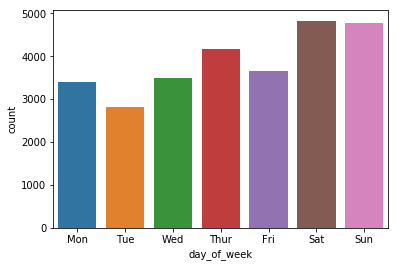

In [206]:
sns.countplot(x='day_of_week',data=df,order='Mon Tue Wed Thur Fri Sat Sun'.split())

# Browsing Count by Hour

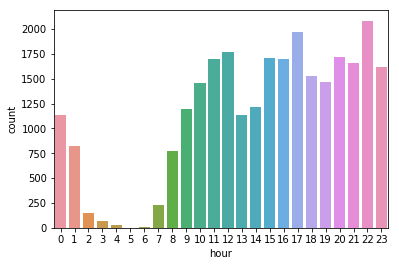

In [200]:
sns.countplot(x='hour',data=df)

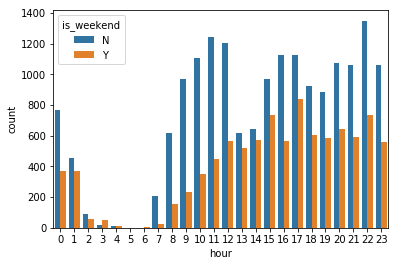

In [204]:
# with not/weekend aspect indicated
sns.countplot(x='hour',hue='is_weekend',data=df)

# Browsing Count by Month

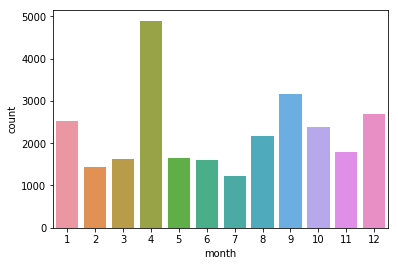

In [201]:
sns.countplot(x='month',data=df)

# Browser Usage by Category

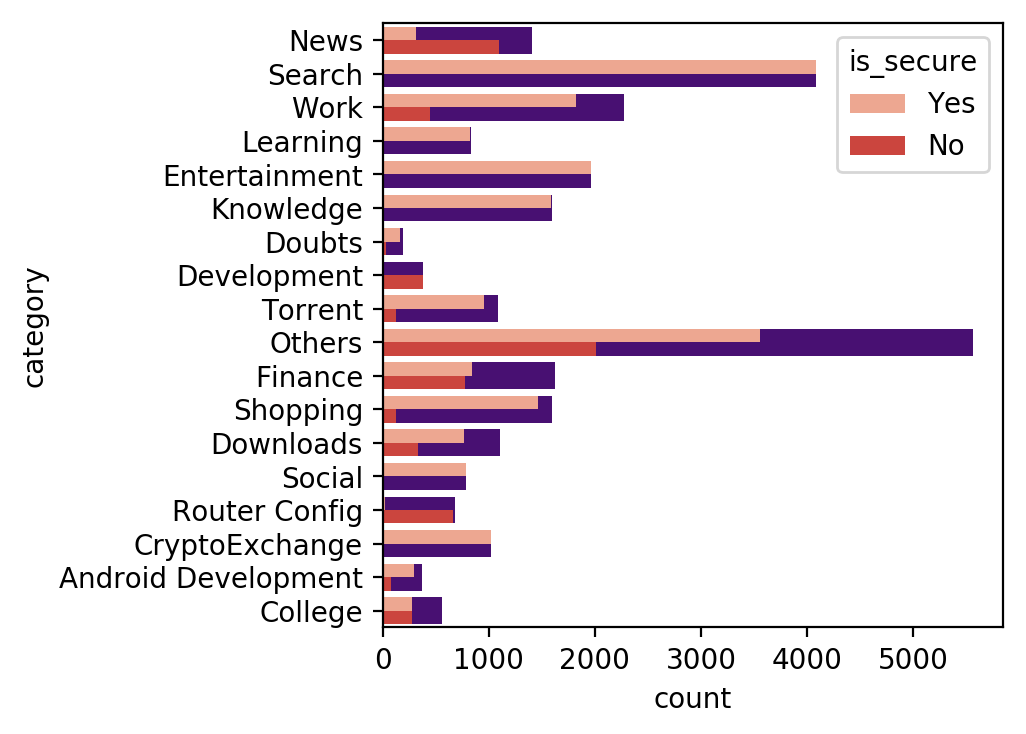

In [55]:
plt.figure(figsize=(4,4), dpi=200)
sns.countplot(y='category',data=df,color='indigo')
sns.countplot(y='category',hue='is_secure',data=df,palette='Reds')

# Browser Usage by Hour over Months

In [150]:
df_m=df.groupby(['hour','month'])['website'].nunique()
df_m=df_m.reset_index(name='count')

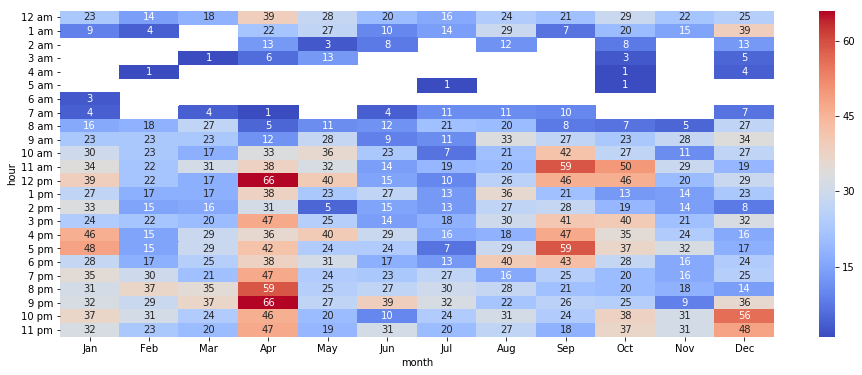

In [228]:
plt.figure(figsize = (16,6))
sns.heatmap(df_m.pivot("hour", "month", "count"), annot=True,cmap="coolwarm",xticklabels=month_labels,yticklabels=hour_labels)

# Browsing usage by hour over days of week

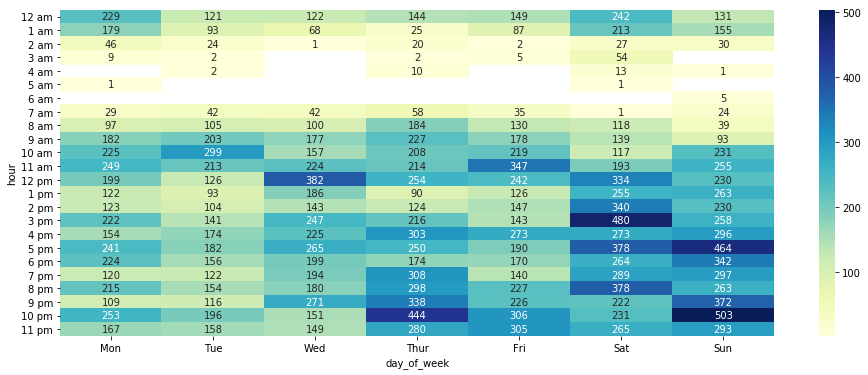

In [229]:
df_dow =df.groupby(['hour','day_of_week'])['website'].size().reset_index(name='count')
plt.figure(figsize=(16,6))
sns.heatmap(df_dow.pivot('hour','day_of_week','count')[days_of_week],annot=True, fmt=".0f",cmap='YlGnBu',yticklabels=hour_labels)

# Browser Usage of Finance Websites (hour by days of week)

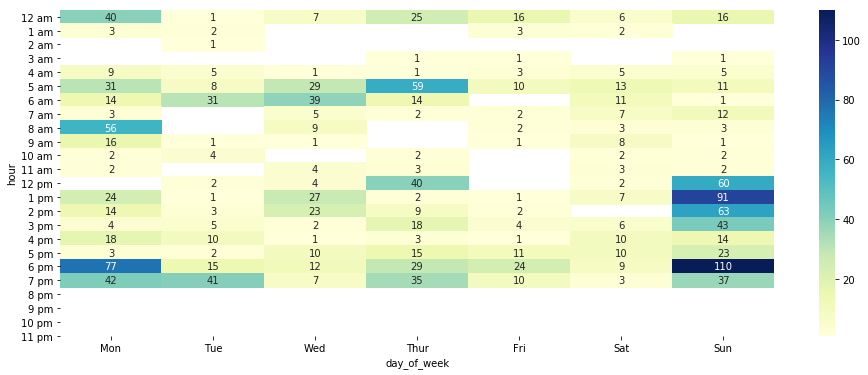

In [230]:
df_fdow =df[(df['category']=='Finance')].groupby(['hour','day_of_week'])['website'].size().reset_index(name='count')
plt.figure(figsize=(16,6))
sns.heatmap(df_fdow.pivot('hour','day_of_week','count')[days_of_week],annot=True, fmt=".0f",cmap='YlGnBu',yticklabels=hour_labels)

# Most Revisited Stackoverflow queries

In [193]:
df_mr = df[df['website']=='stackoverflow'].groupby(['title']).size().reset_index(name='count').sort_values(['count'],ascending=False)
df_mr=df_mr[df_mr['count']>=2]
df_mr

,title,count
21,"How do I resolve ""Cannot find module"" error using Node.js? - Stack Overflow",4
62,android - Replace Fragment inside a ViewPager - Stack Overflow,3
26,"How to use SharedPreferences in Android to store, fetch and edit values - Stack Overflow",3
4,"Asynchronous vs synchronous execution, what does it really mean? - Stack Overflow",3
102,javascript - Moment.js: Format date in a specific timezone - Stack Overflow,2
135,pandas - Read multi-index on the columns from csv file - Stack Overflow,2
61,android - JSONException: Value of type java.lang.String cannot be converted to JSONObject - Stack Overflow,2
103,"javascript - Node.js - ""Cannot find module 'module.js' "" - Stack Overflow",2
47,Visual Studio - Command to collapse all sections of code? - Stack Overflow,2
69,asp.net - sum and multiply of multi field for Aggregations in elasticsearch and nest - Stack Overflow,2


# Categories visited over entire period by hour of day

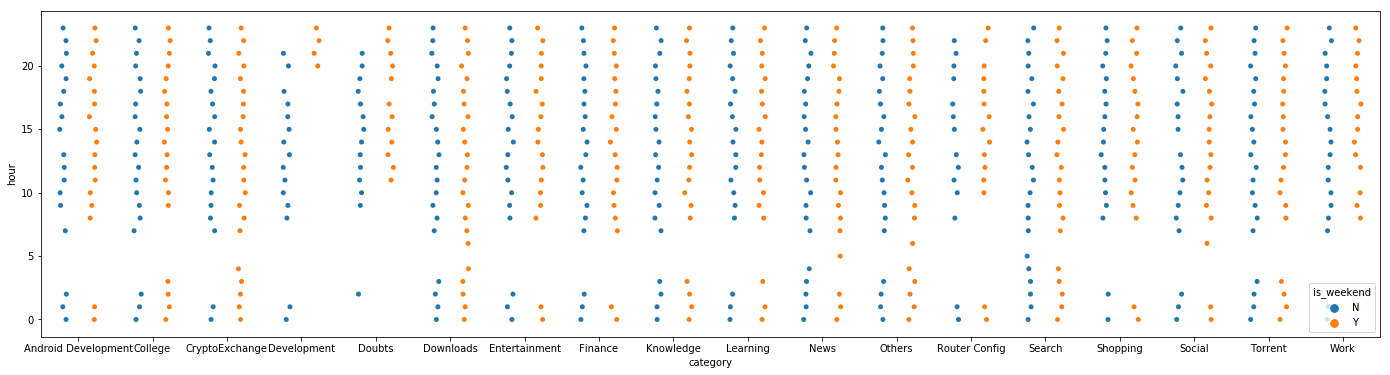

In [240]:
df_str=df.groupby(['category','hour','is_weekend']).size().reset_index(name='count')
plt.figure(figsize=(24,6))
sns.stripplot(x='category', y='hour', hue='is_weekend', data=df_str, jitter=True, orient='v',dodge=True)

# Word Cloud of Titles of Websites Visited

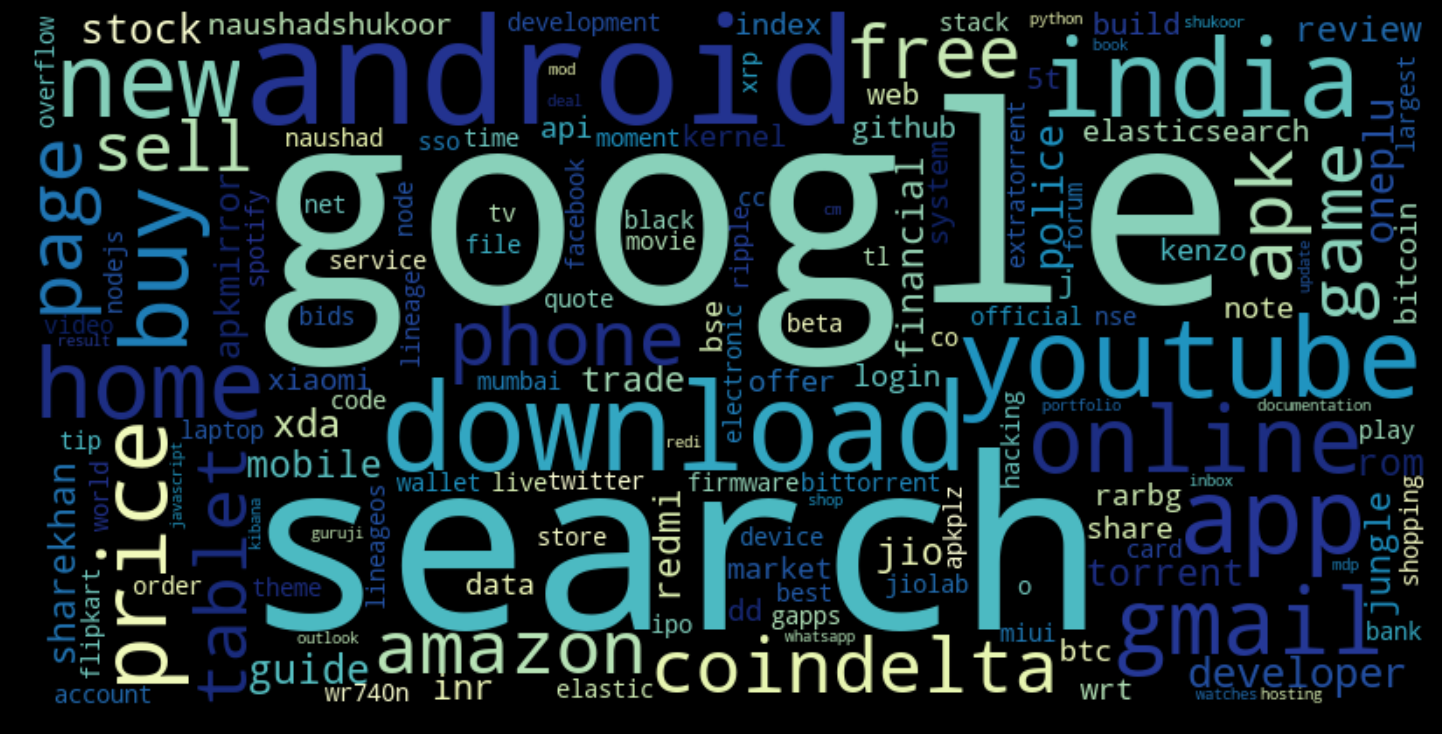

In [302]:
titles = " ".join(df['title']).lower()
stopwords = set(STOPWORDS)
wc = WordCloud(width=800, height=400,stopwords=stopwords,collocations=False, max_words=150,background_color='black',colormap="YlGnBu")
wc.generate(titles)
plt.figure(figsize=(20,10),facecolor='k')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()